In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc
import copy

In [0]:
def moreImportant(importance):
  arrSorted = copy.deepcopy(importance)
  arrSorted.sort()
  arrSorted = arrSorted[::-1]
  indxs = []
  for i in range(0,5):
    temp = np.where(arrSorted[i] == importance)
    temp = int(temp[0])
    indxs.append(temp)
  
  return indxs

In [0]:
def arrayExtend(array):
  binaryList = []
  for i in range (0,10):
    tempArray = np.zeros((len(array)))
    binaryList.append(tempArray)
  ind = 0
  for i in array:
    temp = binaryList[i]
    temp[ind] = 1
    ind = ind + 1
  return binaryList

In [0]:
def forest(clfs,estimators,featuresFracs):
  for estimator in estimators:
    for featuresFrac in featuresFracs:   
      clfs.append(RandomForestClassifier(
              n_estimators = estimator,
              #integer, optional (default=100)
              criterion="gini",
              #string, optional (default=”gini”)
              max_depth=None,
              #integer or None, optional (default=None)
              min_samples_split=2,
              #int, float, optional (default=2)
              min_samples_leaf=1,
              #int, float, optional (default=1)
              min_weight_fraction_leaf=0.0,
              #float, optional (default=0.)
              max_features= featuresFrac,
              #int, float, string or None, optional (default=”auto”)
              max_leaf_nodes=None,
              #int or None, optional (default=None)
              min_impurity_decrease=0.0,
              #float, optional (default=0.)
              bootstrap=True,
              #boolean, optional (default=True)
              oob_score=False,
              #bool (default=False)
              n_jobs=None,
              #int or None, optional (default=None)
              random_state=None,
              #int, RandomState instance or None, optional (default=None)
              verbose=0,
              #int, optional (default=0)
              warm_start=False,
              #bool, optional (default=False)
              ccp_alpha=0.0,
              #non-negative float, optional (default=0.0)
              max_samples=None
              #int or float, default=None
              ))



Random forest description
Trees in forest =  5 Features fraction used =  0.1
-------------


Random forest description
Trees in forest =  5 Features fraction used =  0.6
-------------


Random forest description
Trees in forest =  100 Features fraction used =  0.1
-------------


Random forest description
Trees in forest =  100 Features fraction used =  0.6
-------------


Bar chart Feature number vs appearances



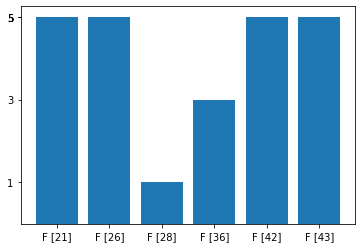

In [29]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3)
estimators = [5, 100]
featuresFracs = [0.1, 0.6]
clfs = []
forest(clfs, estimators, featuresFracs)
description = []
for i in range(1,5):
  if i<3:
    estStr = 'Trees in forest =  ' + str(estimators[0])
  else:
    estStr = 'Trees in forest =  ' + str(estimators[1])
  if i%2==1:
    fracStr = ' Features fraction used =  ' + str(featuresFracs[0])
  else:
    fracStr = ' Features fraction used =  ' + str(featuresFracs[1])
  description.append(estStr + fracStr)

desc = 0
for j in clfs:
  print('')
  print('Random forest description')
  print(description[desc] )
  print('-------------')
  print('')
  j.fit(X_train, y_train)
  y_testList = arrayExtend(y_test)
  ind = 0
  desc = desc + 1
  for i in y_testList:
    print('')
    print('Curva Roc para: ' + str(ind))
    print('-------------')
    print('')
    y_prob = j.predict_proba(X_test)[:,ind]
    fpr_rt_tb, tpr_rt_tb, th = roc_curve(i, y_prob)
    roc_auc = auc(fpr_rt_tb, tpr_rt_tb)
    plt.figure()
    lw = 2
    plt.plot(fpr_rt_tb, tpr_rt_tb, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example - Tree Bagging')
    plt.legend(loc="lower right")
    plt.show()
    ind = ind + 1
clf2 = []
estimators = [10]
featuresFracs = [0.2, 0.4, 0.6, 0.8, 0.99]
forest(clf2, estimators, featuresFracs)
important = []
features = []
for i in clf2:
  i.fit(X_train, y_train)
  fImpor = i.feature_importances_
  important.append(moreImportant(fImpor))
  features.append(i.classes_)
#Plot a bar chart for the most important features
bars=[]
for top in important:
  for feature in top:
    bars.append(feature)
bars.sort()
last = bars[0]
tuples = []
tempCount = 0
for label in bars:
  if last == label:
    tempCount = tempCount + 1
  else:
    n = str(last)
    string = 'F ['+n+']'
    tuples.append((string, tempCount))
    tempCount = 1
    last = label
print('')
print('Bar chart Feature number vs appearances')
print('')
labels, ys = zip(*tuples)
xs = np.arange(len(labels)) * 50
width = 40

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) 
plt.yticks(ys)

plt.savefig('netscore.png')